The following c++ code was written with c++ 17 version.

In [1]:
//Run this cell before any cell.
#include <iostream>
#include <unordered_map>
#include <vector>
#include <string>
#include <algorithm>

In [2]:
//This algorithm corresponds to the Stable Matching Algorithm given in the book
//"Stable Marriage and Its Relation to Other Combinatorial Problems".
//The use of vector of strings has been used instead of just a string since this would have limited us to just 26
//people for each group (females and males).
//We also use unordered_map because, 1) we dont care about the ordering and 2) its faster than a map.
std::unordered_map<std::string,std::string> task_1(std::unordered_map<std::string,std::vector<std::string>> p1, std::unordered_map<std::string,std::vector<std::string>> p2)
{
    //initialising k as in the pseudocode.
    int k = 0;
    
    //Creating a vector with every male and female. Initially it's empty.
    std::vector<std::string> male;
    std::vector<std::string> female;
    
    
    //Populating the male vector.
    for(const auto& p : p1)
    {
        male.push_back(p.first);
    }
    
    //Populating the female vector.
    for(const auto& p : p2)
    {
        female.push_back(p.first);
    }
    
    //Initialising n as in the pseudocode.
    int n = p1[male[1]].size();
    
    //Adding the very undesirable man as the last one to the female preferences.
    for(int j = 0; j<=n-1; j++)
    {
        p2[female[j]].push_back("O");
    }
    
    
    //Creating the matching.
    std::unordered_map<std::string, std::string> matching;
    
    //Matching every female with the undesirable man
    for(int i = 0; i<=n-1; i++)
    {
        matching[female[i]] = "O";
    }
    
    //This corresponds to while k < n in the pseudocode.
    for(int k = 0; k<n;)
    {
        //Initialising X as the k man. Note that we don't use (k+1) as in the pseudocode as c++ indexing starts from 0
        std::string X = male[k];
        //This corresponds to while X not equal to O
        for(;X!="O";)
        {
            //Make x as the best choice remaining on male X's preferences.
            std::string x_curr= p1[X][0];
            
            //See if x prefers X to her current fiance.
            auto pre_ind1 = std::find(p2[x_curr].begin(),p2[x_curr].end(),X);
            int ind1 = std::distance(p2[x_curr].begin(),pre_ind1);
            
            auto pre_ind2 = std::find(p2[x_curr].begin(),p2[x_curr].end(),matching[x_curr]);
            int ind2 = std::distance(p2[x_curr].begin(),pre_ind2);

            //If she does prefer it (ind1<ind2), then engage the male X with female x.
            if (ind1 < ind2)
            {
                std::string X_old = X;
                std::string X_new = matching[x_curr];
                //Engage female x with male X
                matching[x_curr] = X;
                //Make X the preceding fiance of x
                X = X_new;

            }
            // If X not equal to O (X!= 'O') then withdraw x from X's list
            if (X!= "O")
            {
                p1[X].erase(p1[X].begin());
            }
        }
        //Increase k by 1
        k = k + 1;
        
    }
    
    //We reverse the matching so that the resulting matching corresponds to the book format. Note that this step can be skipped.
    std::unordered_map <std::string, std::string> reversed_matching;
    for (const auto& p : matching)
    {
        reversed_matching[p.second] = p.first;
    }
    return reversed_matching;
}

We test the algorithm with Example 3 from the book "Stable Marriage and Its Relation to Other Combinatorial Problems", pg. 3. This uses a 5 by 5 preference table for Females and Males. 

In [3]:
std::unordered_map<std::string,std::vector<std::string>> my_map1_5example
{
    
};
my_map1_5example["A"]={"a","b","c","d","e"};
my_map1_5example["B"]={"b","c","d","e","a"};
my_map1_5example["C"]={"c","d","e","a","b"};
my_map1_5example["D"]={"d","e","a","b","c"};
my_map1_5example["E"]={"e","a","b","c","d"};

std::unordered_map<std::string,std::vector<std::string>> my_map2_5example
{

};

my_map2_5example["a"]={"B","C","D","E","A"};
my_map2_5example["b"]={"C","D","E","A","B"};
my_map2_5example["c"]={"D","E","A","B","C"};
my_map2_5example["d"]={"E","A","B","C","D"};
my_map2_5example["e"]={"A","B","C","D","E"};

(std::vector &) { "A", "B", "C", "D", "E" }


The output we get does indeed correspond to a Stable Matching. More specifically the first in the list given in the book.

In [4]:
std::unordered_map<std::string,std::string> matching_5 = task_1(my_map1_5example,my_map2_5example);

In [5]:
for(auto&p:matching_5)
{
    std::cout <<p.first<<" : "<< p.second<<std::endl;
}

E : e
B : b
C : c
D : d
A : a


Similarly, we test the algorithm with Example 1 from the book "Stable Marriage and Its Relation to Other Combinatorial Problems", pg. 2. This uses a 4 by 4 preference table for Females and Males. 

In [6]:
std::unordered_map<std::string,std::vector<std::string>> my_map1_4example
{
    
};
my_map1_4example["A"]={"c","b","d","a"};
my_map1_4example["B"]={"b","a","c","d"};
my_map1_4example["C"]={"b","d","a","c"};
my_map1_4example["D"]={"c","a","d","b"};

std::unordered_map<std::string,std::vector<std::string>> my_map2_4example
{

};

my_map2_4example["a"]={"A","B","D","C"};
my_map2_4example["b"]={"C","A","D","B"};
my_map2_4example["c"]={"C","B","D","A"};
my_map2_4example["d"]={"B","A","C","D"};


(std::vector &) { "B", "A", "C", "D" }


The output we get does indeed correspond to a Stable Matching.

In [7]:
std::unordered_map<std::string,std::string> matching_4 = task_1(my_map1_4example,my_map2_4example);

In [8]:
for(auto&p:matching_4)
{
    std::cout <<p.first<<" : "<< p.second<<std::endl;
}

D : c
C : b
A : d
B : a


# Task 2

The algorithm we run here has $4  O(N)$ complexity from the 4 initial loops. $O(2N^2 * \log(N))$ for the find function, since it is inside a nested double loop and the find function has $O(2\log(N))$ complexity, (check documentation). Additionally, there is $O(N^2)$ complexity from the erase function, since we have to shift at most $N^2$ items one space to the left. Finally, there is $O(N^2)$ complexity for the double loop itself, as already discussed in the Python assessment. 

Thus overall the complexity is $$O(N^2*(\log(N) + 2)),$$ since we care about the fastest growing term and we could thus ignore the initial $4O(N)$ complexity. Note we also ignore the constant $2$ in the $O(2\log(N))$ term.

# Task 3

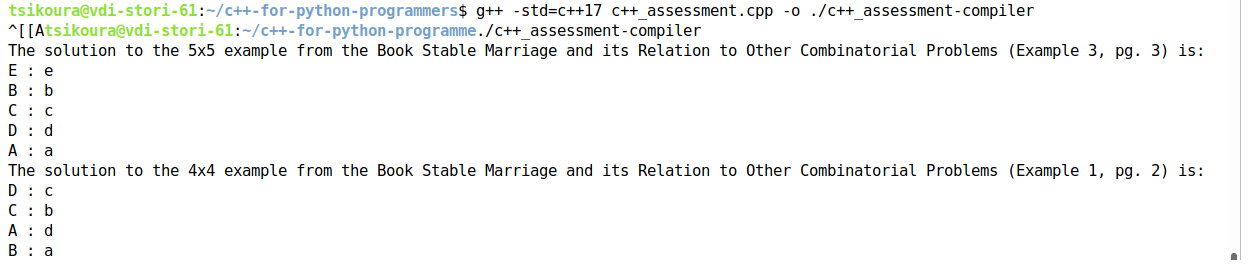